In [192]:
import pandas as pd  # Importing Pandas for data manipulation
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for enhanced data visualization
# Configuring inline plotting in Jupyter
%matplotlib inline 
sns.set_style('darkgrid')  # Setting Seaborn plot style to dark with grid

In [193]:
#Read the dataset
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [194]:
#Check null values in dataset
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [195]:
df.shape

(32561, 15)

In [196]:
df.columns = ['age','workclass','final_weight', 'education', 'education_num', 'marital_status', 'occupation','relationship','race','sex',
              'capital_gain','capital_loss','hrs_per_week','native_country','income']

In [197]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [198]:
df.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hrs_per_week', 'native_country',
       'income'],
      dtype='object')

In [199]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [200]:
#converting income columns to 0's and 1's {0 for salary <=50K and 1 for salary >50K}
df['income'] = [1 if value == ' >50K' else 0 for value in df['income'].values]         

In [201]:
#Last 5 rows in the dataset
df.tail()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [202]:
df.workclass.unique() # Retrieving unique values in the 'workclass' column

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [203]:
#removing ? from column workclass
df['workclass'] = np.where(df.workclass == ' ?', np.nan, df['workclass'])

In [204]:
df.dropna(axis=0,inplace=True) # Removing rows with missing values inplace

In [205]:
# Creating a dictionary to map unique 'workclass' values to their respective labels
workclass_labels = {v:k for k, v in enumerate(df.workclass.unique())}

In [206]:
workclass_labels

{' State-gov': 0,
 ' Self-emp-not-inc': 1,
 ' Private': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' Self-emp-inc': 5,
 ' Without-pay': 6,
 ' Never-worked': 7}

In [207]:
# Mapping 'workclass' values to their corresponding labels using the created dictionary
df.workclass = df.workclass.map(workclass_labels)

In [208]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [209]:
# Creating a dictionary to map unique 'education' values to their respective labels
education_label = {v:k for k, v in enumerate(df.education.unique())}

In [210]:
education_label

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' Preschool': 13,
 ' 12th': 14,
 ' 1st-4th': 15}

In [211]:
df.education = df.education.map(education_label)

<AxesSubplot:xlabel='income', ylabel='count'>

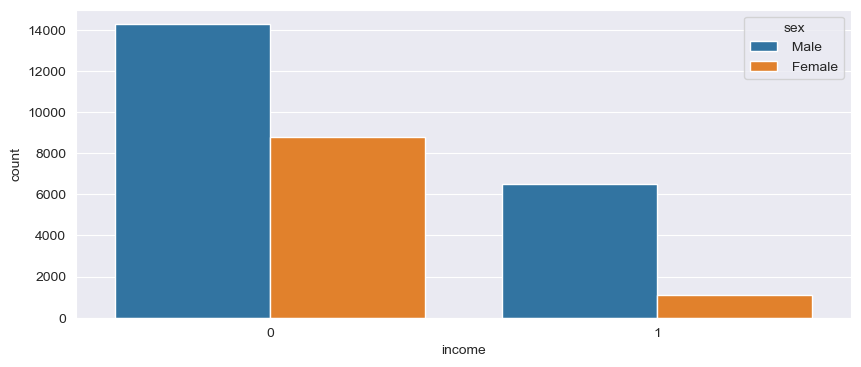

In [212]:
# Creating a new Matplotlib figure with a specified size (width=10, height=4)
plt.figure(figsize=(10,4))
# Creating a Seaborn countplot for 'income' based on data in the DataFrame 'df', 
# with 'sex' data additionally differentiated by hue
sns.countplot(x='income',data=df,hue='sex')

<AxesSubplot:ylabel='native_country'>

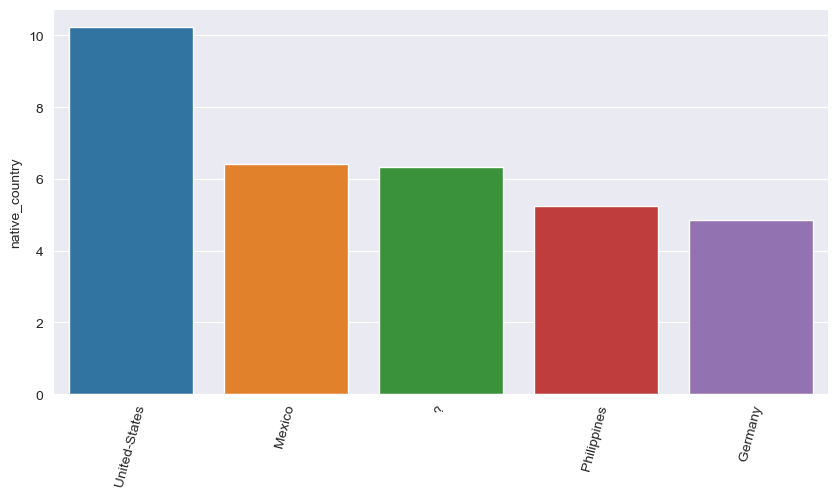

In [213]:
# Extracting the top 5 most frequent 'native_country' values and their counts
native_country = df.native_country.value_counts().nlargest(5)
# Creating a new Matplotlib figure with a specified size (width=10, height=5)
plt.figure(figsize=(10,5))
# Rotating x-axis labels by 75 degrees for better readability
plt.xticks(rotation=75)
# Creating a Seaborn bar plot to visualize the log-transformed counts of top native countries
sns.barplot(x=native_country.index, y=np.log(native_country))

In [214]:
# Replacing ' ?' values with NaN in the 'native_country' column
df.native_country = np.where(df.native_country == ' ?',np.nan,df['native_country'])

In [215]:
# Remove rows with missing values inplace
df.dropna(axis=0,inplace=True)

In [216]:
# Creating a dictionary to map unique 'native_country' values to their respective labels
native_country = {v:k for k,v in enumerate(df.native_country.unique())}

In [217]:
# Mapping 'native_country' values to their corresponding labels using the created dictionary
df.native_country = df.native_country.map(native_country)

In [218]:
# Retrieving unique values in the 'marital_status' column
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [219]:
# Creating a dictionary to map unique 'marital_status' values to their respective labels
marital_label = {v:k for k,v in enumerate(df.marital_status.unique())}

In [220]:
# Mapping 'marital_status' values to their corresponding labels using the created dictionary
df.marital_status = df.marital_status.map(marital_label)

In [221]:
# Replacing ' ?' values with NaN in the 'occupation' column
df.occupation = np.where(df.occupation == ' ?',np.nan, df['occupation'])

In [222]:
# Removing rows with missing values inplace
df.dropna(axis=0,inplace=True)

In [223]:
# Creating a dictionary to map unique 'occupation' values to their respective labels
occupation_label = {v:k for k,v in enumerate(df.occupation.unique())}

In [224]:
# Mapping 'occupation' values to their corresponding labels using the created dictionary
df.occupation = df.occupation.map(occupation_label)

In [225]:
# Retrieving unique values in the 'relationship' column
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [226]:
# Creating a dictionary to map unique 'relationship' values to their respective labels
relationship_label = {v:k for k, v in enumerate(df.relationship.unique())}

In [227]:
# Mapping 'relationship' values to their corresponding labels using the created dictionary
df.relationship = df.relationship.map(relationship_label)

In [228]:
# Replacing 'Male' values with 1 and other values with 0 in the 'sex' column
df.sex = np.where(df.sex == 'Male',1,0)

In [229]:
# Creating a dictionary to map unique 'race' values to their respective labels
race_label = {v:k for k,v in enumerate(df.race.unique())}

In [230]:
# Mapping 'race' values to their corresponding labels using the created dictionary
df.race = df.race.map(race_label)

In [231]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


<AxesSubplot:>

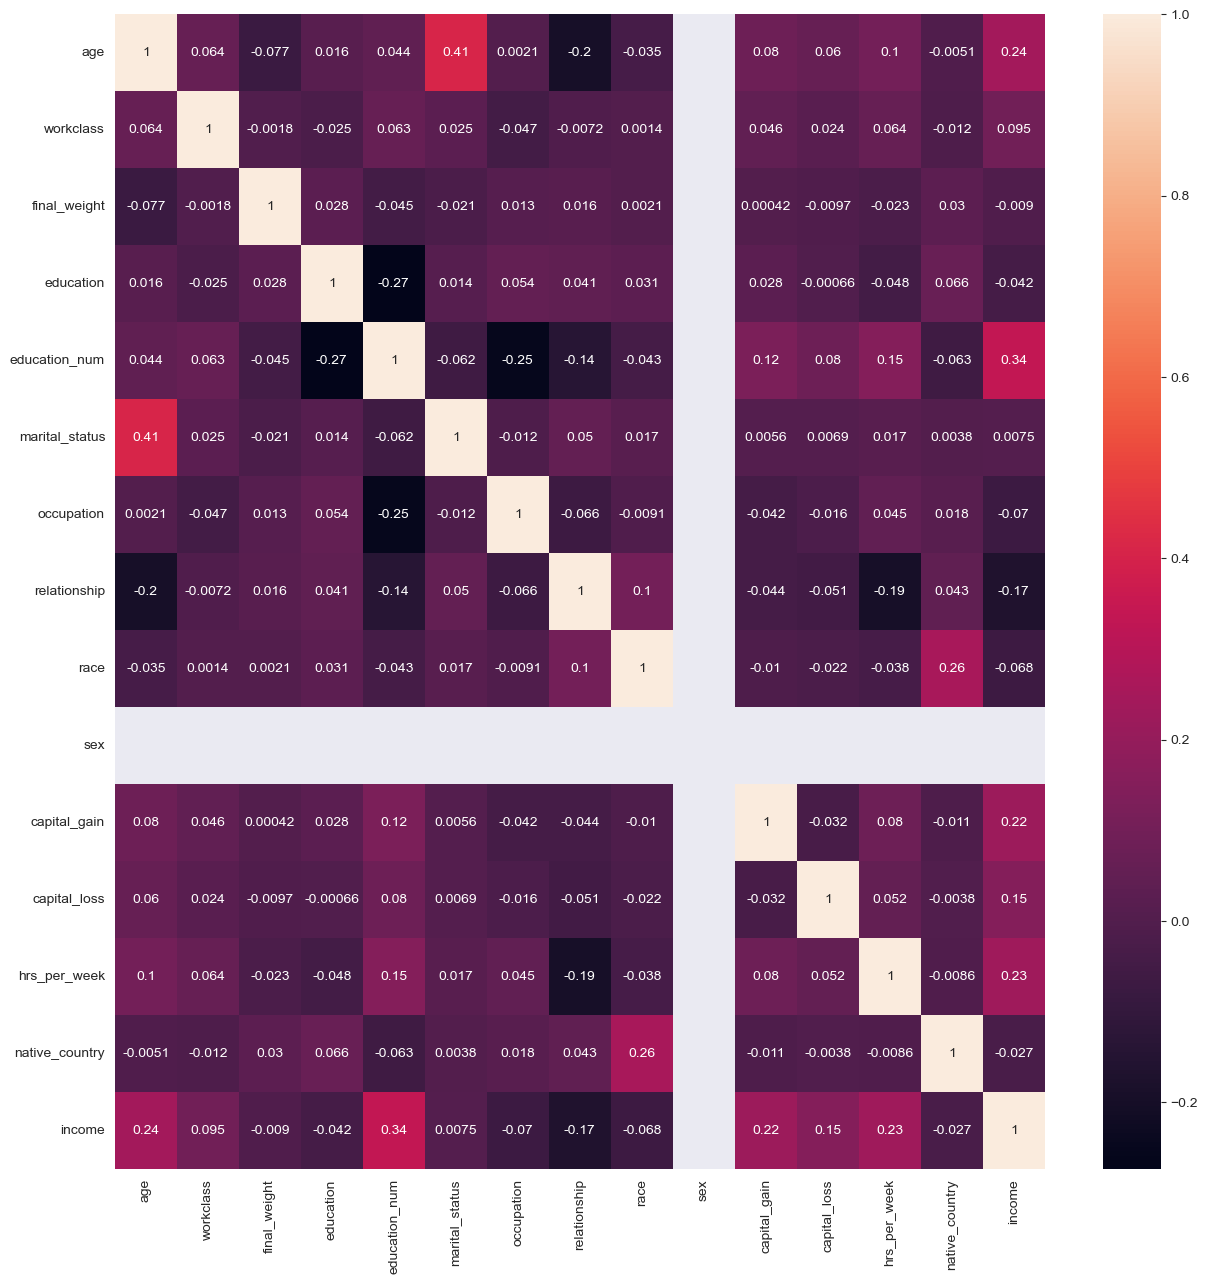

In [232]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [233]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,0,0,0,40,1,0


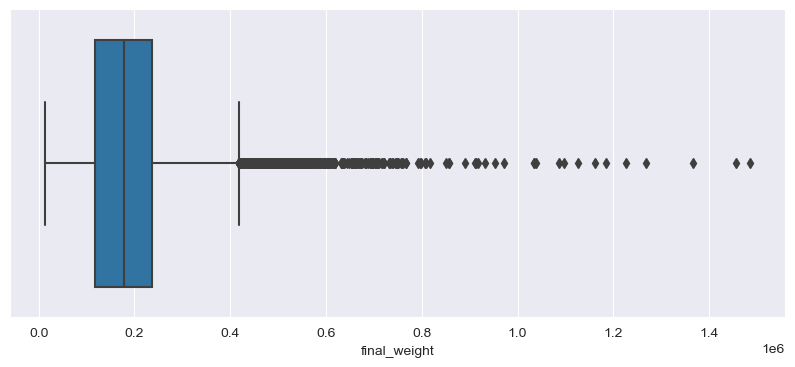

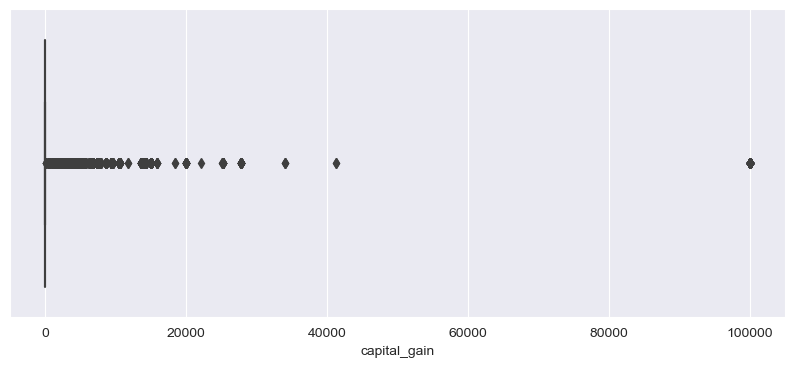

In [234]:
for feature in ['final_weight', 'capital_gain']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[feature],data=df)

In [235]:
df.describe()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,income
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.109343,1.897938e+05,3.368842,10.121312,1.075061,4.615609,1.523971,0.211823,0.0,1092.007858,88.372489,40.931238,1.183509,0.248922
std,13.134665,0.934785,1.056530e+05,3.404320,2.549995,1.217557,3.432195,1.431980,0.612461,0.0,7406.346497,404.298370,11.979984,4.947070,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.0,0.000000,0.000000,40.000000,0.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,5.000000,13.000000,1.000000,8.000000,3.000000,0.000000,0.0,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,0.0,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [236]:
# Importing the train_test_split function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Importing the StandardScaler class for feature scaling
from sklearn.preprocessing import StandardScaler

In [237]:
# Extracting all rows and all columns except the last one as feature variables (X)
X = df.iloc[:, :-1]
# Extracting all rows from the last column as the target variable (y)
y = df.iloc[:, -1]

In [238]:
# Converting the feature DataFrame X to a NumPy array for compatibility with scikit-learn
X = X.values
# Converting the target Series y to a NumPy array for compatibility with scikit-learn
y = y.values
# Creating an instance of StandardScaler for feature scaling
sc = StandardScaler()
# Fitting the StandardScaler to the feature data X and transforming it to scaled values
sc.fit_transform(X)

array([[ 0.04279571, -2.25653747, -1.0627216 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [ 0.88028814, -1.18675527, -1.00787131, ..., -0.21858598,
        -2.3315307 , -0.23923831],
       [-0.03333996, -0.11697307,  0.24469349, ..., -0.21858598,
        -0.07773411, -0.23923831],
       ...,
       [ 1.48937355, -0.11697307, -0.3585745 , ..., -0.21858598,
        -0.07773411, -0.23923831],
       [-1.25151078, -0.11697307,  0.11070545, ..., -0.21858598,
        -1.74721307, -0.23923831],
       [ 1.0325595 ,  3.09237353,  0.92884082, ..., -0.21858598,
        -0.07773411, -0.23923831]])

In [239]:
# Splitting the data into training and testing sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [240]:
# Importing the LogisticRegression class for training a logistic regression model
from sklearn.linear_model import LogisticRegression

In [241]:
# Creating an instance of Logistic Regression model for classification
lg = LogisticRegression()

In [242]:
# Fitting the logistic regression model to the training data
lg.fit(X_train,y_train)

LogisticRegression()

In [243]:
# Generating predictions using the trained logistic regression model on the test data
pred = lg.predict(X_test)

In [244]:
# Importing metrics and evaluation functions for model performance assessment
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

--------------------------------------------Classification Report---------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.71      0.25      0.37      2282

    accuracy                           0.79      9049
   macro avg       0.75      0.61      0.62      9049
weighted avg       0.77      0.79      0.74      9049

------------------------------------------Accuracy Score---------------------------------------------------------
0.785390650900652
--------------------------------------------Confustion Matrix-----------------------------------------------------


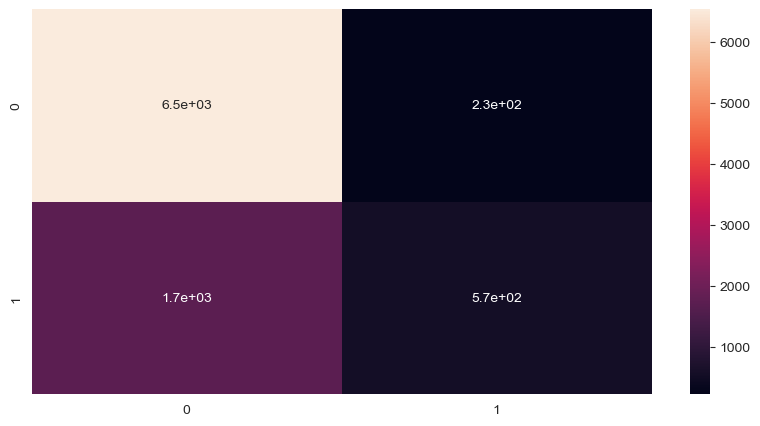

In [245]:
# Printing a detailed classification report to evaluate model performance
print("--------------------------------------------Classification Report---------------------------------------------")
print(classification_report(y_test, pred))

# Printing the accuracy score of the model on the test data
print("------------------------------------------Accuracy Score---------------------------------------------------------")
print(accuracy_score(y_test, pred))

# Creating a new Matplotlib figure with specified size (width=10, height=5)
print("--------------------------------------------Confustion Matrix-----------------------------------------------------")

# Creating a Seaborn heatmap to visualize the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, pred), annot=True);